In [10]:
from pandas import DataFrame, read_csv
from helpers.preprocess import preprocess_data
from helpers.preprocess import drop_unnecessary_columns
from helpers.preprocess import fill_empty_values

import pandas as pd 
import numpy as np

In [11]:
movies_md = r'dataset/movies_tmdbMeta.csv'
movies_md_df = pd.read_csv(movies_md)
pd.set_option('display.max_columns', 50)

In [12]:
movies_md_df = preprocess_data(movies_md_df)

In [13]:
# GENRES

s = movies_md_df.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'genre'
gen_df = movies_md_df.drop('genres', axis=1).join(s)
gen_df['genre'].value_counts().shape[0]

20

In [14]:
pop_gen = pd.DataFrame(gen_df['genre'].value_counts()).reset_index()
pop_gen.columns = ['genre', 'movies']
pop_gen.head(20)

,genre,movies
0,Drama,20808
1,Comedy,13467
2,Thriller,7793
3,Romance,6923
4,Action,6727
5,Horror,4760
6,Crime,4387
7,Documentary,4050
8,Adventure,3587
9,Science Fiction,3137


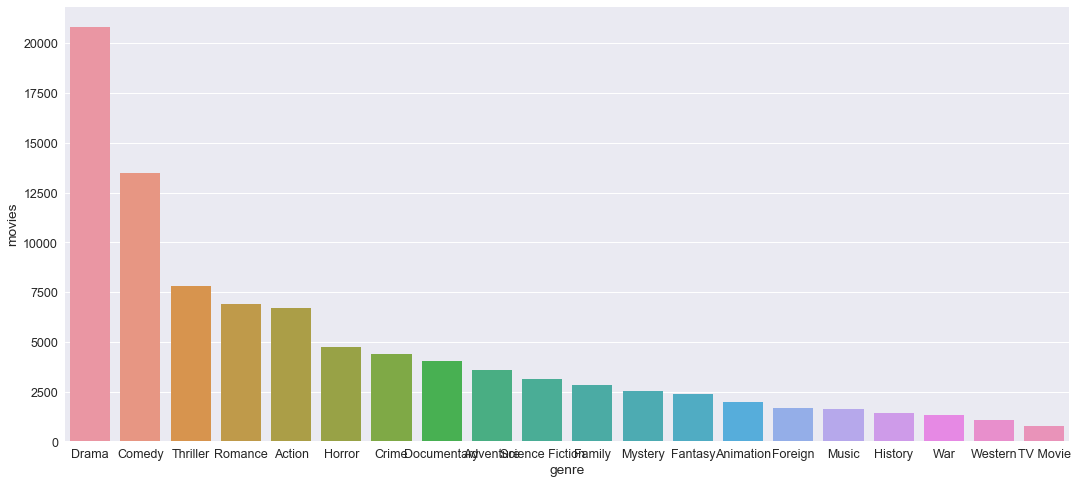

In [ ]:
# Graphical Representation of Genres
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set(font_scale=1.25)

plt.figure(figsize=(18,8))
sns.barplot(x='genre', y='movies', data=pop_gen.head(20))
plt.show()

In [ ]:
# PRODUCTION COUNTRIES

s = movies_md_df.apply(lambda x: pd.Series(x['production_countries']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'production_country'
gen_df = movies_md_df.drop('production_countries', axis=1).join(s)
gen_df['production_country'].value_counts().shape[0]

In [ ]:
pop_gen = pd.DataFrame(gen_df['production_country'].value_counts()).reset_index()
pop_gen.columns = ['production_country', 'movies']
pop_gen.head(20)

In [ ]:
# Drop all the extra columns we don't need
movies_md_df = drop_unnecessary_columns(movies_md_df)

# Fill empty values
movies_md_df = fill_empty_values(movies_md_df)

movies_md_df.head()

In [ ]:
# Make input and output files

y = movies_md_df[['rating']]
y.to_csv('dataset/Y.csv', index=False)
movies_md_df = movies_md_df.drop(['rating'], 1)

movies_md_df.to_csv('dataset/X.csv', index=True, index_label='Id')

In [ ]:
movies_md_df.isna().any()